# Non_depressive data collections from public databases

Here we try to get some neutral as well as emotional data from the competition (SemEval-2018 Task 1: Affect in Tweets (AIT-2018)) (https://competitions.codalab.org/competitions/17751#learn_the_details)

There are various subtasks and datasets. We decided to use the one with annotated Emotional Intensity, which is of Gold standard. This will allow us to be more specific about the type and range of emotions to include in our dataset, and more confident of the depth of its emotional content since it has been professionally annotated.

This notebook shows our analytical process in making the decision for inclusion. We try to find distinguishable patterns for each category in order to draw generalisaton based on their intensity score.

## Loading datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/NLP/Depression_Detection/Data_Gathering_public_databases')

In [ ]:
## Loading required libraries

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
%matplotlib inline

In [ ]:
## Loading datasets
df_anger = pd.read_csv("/content/drive/MyDrive/NLP/Depression_Detection/Data_Gathering_public_databases/2018-EI-reg-En-anger-test-gold.txt", delimiter="\t")
df_fear = pd.read_csv("/content/drive/MyDrive/NLP/Depression_Detection/Data_Gathering_public_databases/2018-EI-reg-En-fear-test-gold.txt", delimiter="\t")
df_joy = pd.read_csv("/content/drive/MyDrive/NLP/Depression_Detection/Data_Gathering_public_databases/2018-EI-reg-En-joy-test-gold.txt", delimiter="\t")
df_sadness = pd.read_csv("/content/drive/MyDrive/NLP/Depression_Detection/Data_Gathering_public_databases/2018-EI-reg-En-sadness-test-gold.txt", delimiter="\t")

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
df_anger.head()

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-02328,@PageShhh1 I know you mean well but I'm offended. Prick.,anger,0.734
1,2018-En-02617,"Let go of resentment, it will hold you back, do not worry about what could of been, what is to come is what matters.",anger,0.422
2,2018-En-01021,"No, I'm not 'depressed because of the weather,' I'm depressed because I have #depression #sicknotweak",anger,0.663
3,2018-En-03737,#AmarnathTerrorAttack Muslims are killing everywhere Syria Iraq Palestine Everyday beyond They say that Islam is terrorism shame on you,anger,0.703
4,2018-En-03407,Prepare to suffer the sting of Ghost Rider's power! Prepare to know the true meaning of hell!,anger,0.719


In [ ]:
df_anger.shape

(17939, 4)

In [ ]:
df_fear.head()

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-02626,"@EdmundPAdamus That's the horrific irony; while we 'cleanse' society of moral value, a new religion will rise up &amp; fill the gap - unhindered",fear,0.596
1,2018-En-00320,@TuckerCarlson @krauthammer @FoxNews They always need the drama and a fight to feel adaquate. Sad power is so insecure!!!,fear,0.533
2,2018-En-03973,@executivegoth I tried a free Alpha trial to watch #dread and I'm sold. Worth the subscription alone. You all are incredible!,fear,0.179
3,2018-En-02615,"@anya_sisi Off to jail with lots of other like minded muslims, with his koran, prayer mat, halal #islam = #terrorism",fear,0.640
4,2018-En-03312,My boss said to another girl who is leaving 'i hope your new job is shit.' How pathetic. Hence why people are leaving in droves.,fear,0.533


In [ ]:
df_fear.shape

(17923, 4)

In [ ]:
df_joy.head()

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-00290,People are truly #amazing. #inspiring day,joy,0.712
1,2018-En-03093,What are some good #funny #entertaining #interesting accounts I should follow ? My twitter is dry,joy,0.339
2,2018-En-00588,"@NoahWebHouse A review of my book faulted me for spending so much time on Webster's introductory front matter. But I had to, #brilliant!",joy,0.533
3,2018-En-01532,#good to learning #wisdom &lt;&lt; reform (v): make in order to improve something &gt;&gt;,joy,0.281
4,2018-En-03258,"Really excited to see our team this year, and especially moving in the next 2-3 years when his guys start playing significant minutes.",joy,0.797


In [ ]:
df_joy.shape

(18042, 4)

In [ ]:
df_sadness.head()

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-03239,@TerraJole is a bully. plain and simple.,sadness,0.550
1,2018-En-02839,@LondonEconomic Sometimes our judiciary just leaves you breathless and speechless.,sadness,0.521
2,2018-En-01035,#pause You gotta luv March Madness. Mad?? More like #upset,sadness,0.525
3,2018-En-01920,Massive night tonight with the decider! Who you got? @QLDmaroons or @NSWRL ??? Can the #blues get it done?! #origin #StateOfOrigin,sadness,0.306
4,2018-En-03155,@RGUpdate Have you tried English hospital food ?? #yak #gross #horrible,sadness,0.553


In [ ]:
df_sadness.shape

(17912, 4)

## Data Cleaning

Data cleaning is one of the essential steps because without a proper cleaning procedure you will have errors in your analysis and eventually your data-driven results. Here I try to eliminate duplicates tweets by using the Primary key ('ID'), checked for empty rows and replaced “NaN” if there is any.

In [ ]:
## Check the data type of each column
df_anger.dtypes.to_frame().rename(columns={0:'data_type'})

,data_type
ID,object
Tweet,object
Affect Dimension,object
Intensity Score,float64


In [ ]:
df_fear.dtypes.to_frame().rename(columns={0:'data_type'})

,data_type
ID,object
Tweet,object
Affect Dimension,object
Intensity Score,float64


In [ ]:
df_joy.dtypes.to_frame().rename(columns={0:'data_type'})

,data_type
ID,object
Tweet,object
Affect Dimension,object
Intensity Score,float64


In [ ]:
df_fear.dtypes.to_frame().rename(columns={0:'data_type'})

,data_type
ID,object
Tweet,object
Affect Dimension,object
Intensity Score,float64


In [ ]:
## Finding unique values in each column
for col in df_anger:
    print("There are ", len(df_anger[col].unique()), "unique values in ", col)

There are  17939 unique values in  ID
There are  17939 unique values in  Tweet
There are  1 unique values in  Affect Dimension
There are  236 unique values in  Intensity Score


In [ ]:
for col in df_fear:
    print("There are ", len(df_fear[col].unique()), "unique values in ", col)

There are  17923 unique values in  ID
There are  17923 unique values in  Tweet
There are  1 unique values in  Affect Dimension
There are  342 unique values in  Intensity Score


In [ ]:
for col in df_joy:
    print("There are ", len(df_joy[col].unique()), "unique values in ", col)

There are  18042 unique values in  ID
There are  18042 unique values in  Tweet
There are  1 unique values in  Affect Dimension
There are  220 unique values in  Intensity Score


In [ ]:
for col in df_sadness:
    print("There are ", len(df_sadness[col].unique()), "unique values in ", col)

There are  17912 unique values in  ID
There are  17912 unique values in  Tweet
There are  1 unique values in  Affect Dimension
There are  355 unique values in  Intensity Score


**Comment:** There are no duplicates in our ID column for each datasets.

In [ ]:
## Find the number of Null values in each columns
df_anger.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
ID,0
Tweet,0
Affect Dimension,0
Intensity Score,0


In [ ]:
df_fear.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
ID,0
Tweet,0
Affect Dimension,0
Intensity Score,0


In [ ]:
df_joy.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
ID,0
Tweet,0
Affect Dimension,0
Intensity Score,0


In [ ]:
df_sadness.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
ID,0
Tweet,0
Affect Dimension,0
Intensity Score,0


**Comments:** We don't have any missing values in our datasets.

## Exploratory Data Analysis

       Intensity Score
count  17939.000000   
mean   0.029009       
std    0.127397       
min    0.000000       
25%    0.000000       
50%    0.000000       
75%    0.000000       
max    0.953000       


Text(0, 0.5, 'Frequency')

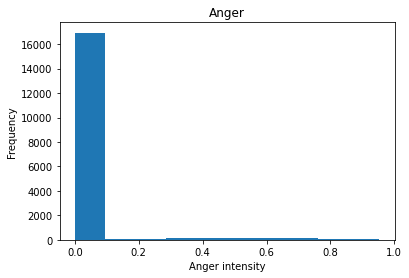

In [ ]:
## Let's check the distribution of our datasets
print(df_anger.describe())

## Histogram of our datasets

plt.hist(df_anger["Intensity Score"], bins=10)
plt.title('Anger')
plt.xlabel('Anger intensity')
plt.ylabel('Frequency')


       Intensity Score
count  17923.000000   
mean   0.028115       
std    0.123962       
min    0.000000       
25%    0.000000       
50%    0.000000       
75%    0.000000       
max    0.942000       


Text(0, 0.5, 'Frequency')

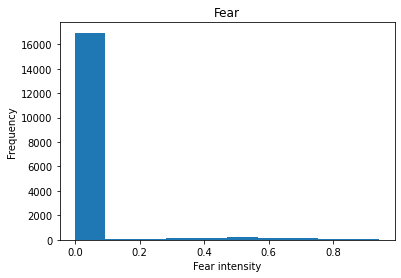

In [ ]:
print(df_fear.describe())

## Histogram of our datasets

plt.hist(df_fear["Intensity Score"], bins=10)
plt.title('Fear')
plt.xlabel('Fear intensity')
plt.ylabel('Frequency')

       Intensity Score
count  18042.000000   
mean   0.032138       
std    0.134278       
min    0.000000       
25%    0.000000       
50%    0.000000       
75%    0.000000       
max    0.968000       


Text(0, 0.5, 'Frequency')

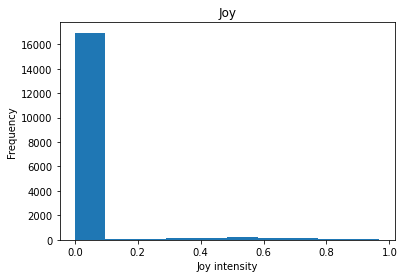

In [ ]:
print(df_joy.describe())

## Histogram of our datasets

plt.hist(df_joy["Intensity Score"], bins=10)
plt.title('Joy')
plt.xlabel('Joy intensity')
plt.ylabel('Frequency')

       Intensity Score
count  17912.000000   
mean   0.027843       
std    0.123550       
min    0.000000       
25%    0.000000       
50%    0.000000       
75%    0.000000       
max    0.973000       


Text(0, 0.5, 'Frequency')

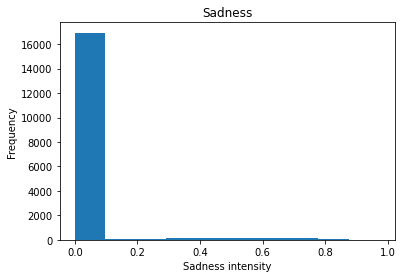

In [ ]:
print(df_sadness.describe())

## Histogram of our datasets

plt.hist(df_sadness["Intensity Score"], bins=10)
plt.title('Sadness')
plt.xlabel('Sadness intensity')
plt.ylabel('Frequency')

**Comments:** It seems that large portion of the tweets have an emotional intensity close to zero, so we have to first figure out explore close to zero intensities and see if they are worthy to keep for our purpose.

In [ ]:
## Exploring low intesity tweets

print(df_anger["Intensity Score"].value_counts().head())
print(df_fear["Intensity Score"].value_counts().head())
print(df_joy["Intensity Score"].value_counts().head())
print(df_sadness["Intensity Score"].value_counts().head())

0.000    16937
0.516    27   
0.500    26   
0.547    23   
0.469    22   
Name: Intensity Score, dtype: int64
0.000    16937
0.500    31   
0.517    15   
0.375    13   
0.625    12   
Name: Intensity Score, dtype: int64
0.000    16937
0.516    25   
0.484    25   
0.500    24   
0.547    23   
Name: Intensity Score, dtype: int64
0.000    16937
0.500    43   
0.750    11   
0.429    11   
0.333    10   
Name: Intensity Score, dtype: int64


In [ ]:
## Seperating the zero intensity data from the rest to explore them further
df_anger0 = df_anger[df_anger["Intensity Score"] == 0]
df_fear0 = df_fear[df_fear["Intensity Score"] == 0]
df_joy0 = df_joy[df_joy["Intensity Score"] == 0]
df_sadness0 = df_sadness[df_sadness["Intensity Score"] == 0]

In [ ]:
## Randomly choose 10 tweets from each datasets
print(df_anger0.sample(n=10, replace=True).Tweet,'\n', df_fear0.sample(n=10, replace=True).Tweet, '\n',
      df_joy0.sample(n=10, replace=True).Tweet, '\n', df_sadness0.sample(n=10, replace=True).Tweet)

5585     Torrance told us all about the recent funny events.
5208     Jasmine is studying art.                           
10832    Ellen made me feel devastated.                     
2238     Amanda is a lousy librarian.                       
1873     Frank made me feel happy.                          
17332    I saw Stephanie in the market.                     
13015    Frank is an accomplished surgeon.                  
13753    I made Lakisha feel sad.                           
14434    Jamel is proficient in physics.                    
8267     Adam is taking a chemistry class.                  
Name: Tweet, dtype: object 
 10936    She wants to be a bartender.                            
2362     I'm meeting my friends at an Italian restaurant tonight.
15193    My mother is a lousy hygienist.                         
6606     The conversation with a Thai was funny.                 
13224    The situation makes Leroy feel glad.                    
3663     Ebony made me feel gla

**Comments:** The tweets seems to be the same for all our datasets and are not representing the true emotions; consequently might cause some bias in our model training step. Therefore, it would be better to exclude them.

In [ ]:
## Creating datasets without zero emotional intensity

newdf_anger = df_anger[df_anger["Intensity Score"] != 0]
newdf_fear = df_fear[df_fear["Intensity Score"] != 0]
newdf_joy = df_joy[df_joy["Intensity Score"] != 0]
newdf_sadness = df_sadness[df_sadness["Intensity Score"] != 0]

No handles with labels found to put in legend.


       Intensity Score
count  1002.000000    
mean   0.519358       
std    0.189535       
min    0.050000       
25%    0.379000       
50%    0.516000       
75%    0.656000       
max    0.953000       


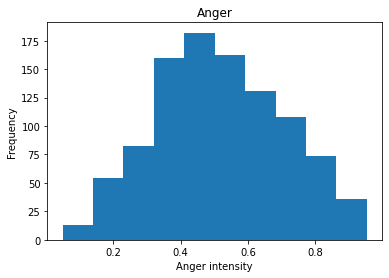

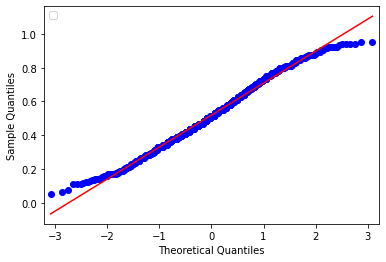

In [ ]:
## Let's check the distribution of our new datasets

print(newdf_anger.describe())

## Histogram of our datasets

plt.hist(newdf_anger["Intensity Score"], bins=10)
plt.title('Anger')
plt.xlabel('Anger intensity')
plt.ylabel('Frequency')

# q-q plot
qqplot(newdf_anger["Intensity Score"], line='s')
plt.show()

       Intensity Score
count  986.000000     
mean   0.511069       
std    0.180334       
min    0.058000       
25%    0.383000       
50%    0.517000       
75%    0.638000       
max    0.942000       


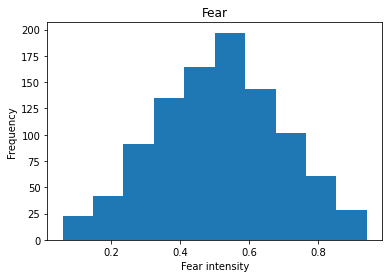

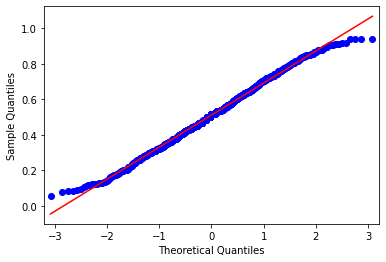

In [ ]:
print(newdf_fear.describe())

## Histogram of our datasets

plt.hist(newdf_fear["Intensity Score"], bins=10)
plt.title('Fear')
plt.xlabel('Fear intensity')
plt.ylabel('Frequency')

# q-q plot
qqplot(newdf_fear["Intensity Score"], line='s')
plt.show()

       Intensity Score
count  1105.000000    
mean   0.524730       
std    0.189567       
min    0.047000       
25%    0.383000       
50%    0.531000       
75%    0.667000       
max    0.968000       


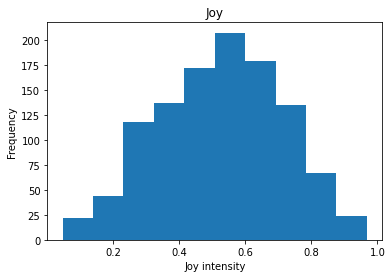

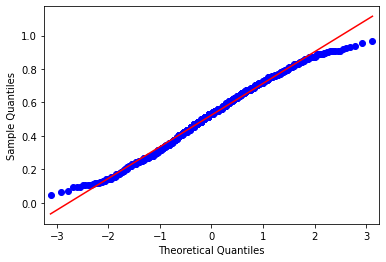

In [ ]:
print(newdf_joy.describe())

## Histogram of our datasets

plt.hist(newdf_joy["Intensity Score"], bins=10)
plt.title('Joy')
plt.xlabel('Joy intensity')
plt.ylabel('Frequency')

# q-q plot
qqplot(newdf_joy["Intensity Score"], line='s')
plt.show()

       Intensity Score
count  975.000000     
mean   0.511510       
std    0.181798       
min    0.093000       
25%    0.380000       
50%    0.500000       
75%    0.646000       
max    0.973000       


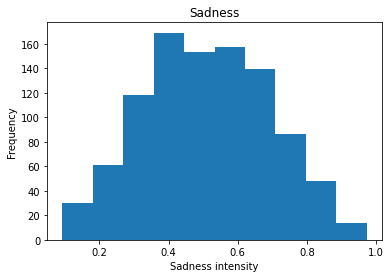

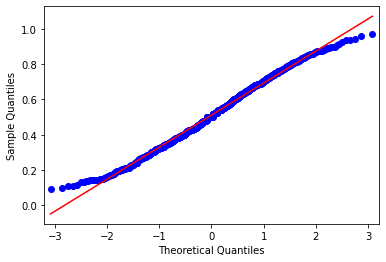

In [ ]:
print(newdf_sadness.describe())

## Histogram of our datasets

plt.hist(newdf_sadness["Intensity Score"], bins=10)
plt.title('Sadness')
plt.xlabel('Sadness intensity')
plt.ylabel('Frequency')

# q-q plot
qqplot(newdf_sadness["Intensity Score"], line='s')
plt.show()

**Comments:** Each dataset has almost 1000 records without zero emotional intensity which are all noramlly distributed (Gaussian distribution) based on their histograms and qq-plots